Import modules

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as mysql

Load data from csv files in dataframe

In [10]:
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('rating.csv')

### Genre Analysis:

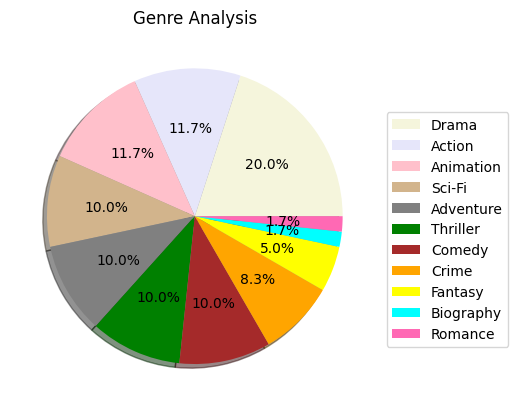

In [11]:
# It returns a new DataFrame containing the counts for each genre, with the genres as the index.
genre_counts = movies_df['genre'].value_counts()

colors = ["beige" , "Lavender" , "pink" , "tan", "grey", "green" , "brown" , "orange" , "yellow" , "cyan" , "hotpink"]
# 1.1f% 1 is width(whitespaces are added if not available width data) and  .1 is representing value after decimal
plt.pie(genre_counts, autopct='%1.1f%%', shadow=True, colors=colors)
plt.legend(labels = genre_counts.index , bbox_to_anchor=(1, 0.8))
plt.title('Genre Analysis')
plt.show()

### Movie Popularity Over Time:

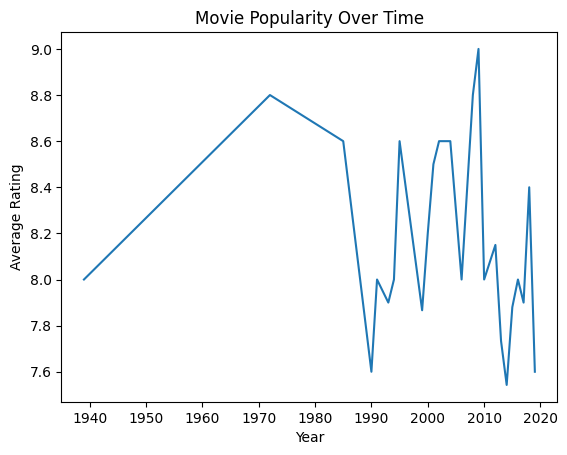

In [12]:
# Merge the two datasets based on the 'movie_name' column
merged_df = movies_df.merge(ratings_df, on='movie_name')

# Convert the 'release_year' column to datetime format
merged_df['release_year'] = pd.to_datetime(merged_df['release_year'], format='%Y')

# Calculate the average rating per year
popularity_over_time = merged_df.groupby('release_year')['rating'].mean()

plt.plot(popularity_over_time.index, popularity_over_time)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Movie Popularity Over Time')
plt.show()

### Movie Genre Popularity Over Time:

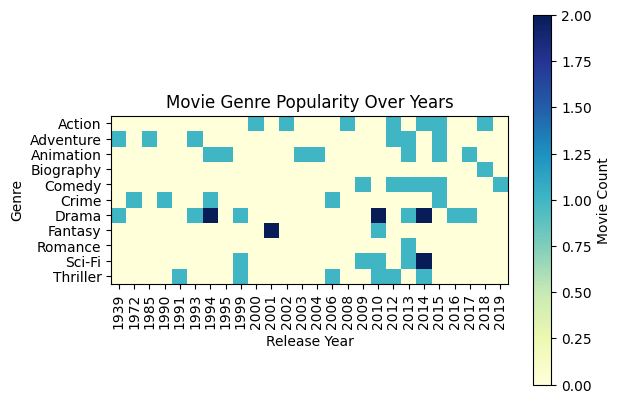

In [13]:
# Create a pivot table to get the genre-year matrix
genre_year_matrix = movies_df.pivot_table(index='genre', columns='release_year', aggfunc='size', fill_value=0)

# Create the heatmap using matplotlib
heatmap = plt.imshow(genre_year_matrix, cmap='YlGnBu')

# Customize the heatmap
plt.title('Movie Genre Popularity Over Years')
plt.xlabel('Release Year')
plt.ylabel('Genre')

# Get the list of release years and genre names
release_years = genre_year_matrix.columns.tolist()
genres = genre_year_matrix.index.tolist()

# Add tick labels for release years and genre names
plt.xticks(range(len(release_years)), release_years, rotation='vertical')
plt.yticks(range(len(genres)), genres)

# Add color bar legend
cbar = plt.colorbar(heatmap)
cbar.set_label('Movie Count')

# Display the heatmap
plt.show()

### Movie Budget and Revenue

Compare the budgets and revenues of movies using a scatter plot or a bubble chart in sub-plots

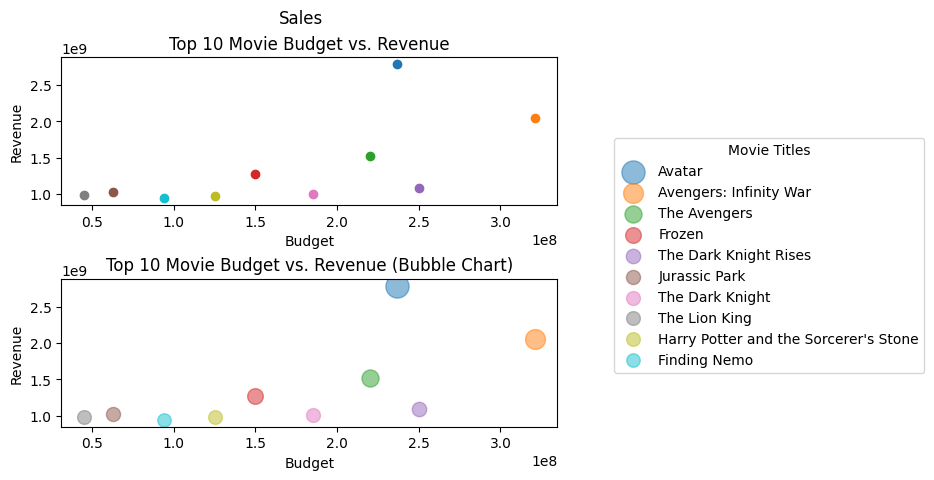

In [14]:
# Take only the top 10 revenue movies
movies_df.sort_values(by='revenue', ascending=False, inplace=True)
top_10_movies = movies_df.head(10)

# Compare the budgets and revenues of the top 10 movies using a scatter plot
plt.subplot(2, 1, 1)
for i, movie in top_10_movies.iterrows():
    plt.scatter(movie['budget'], movie['revenue'], label=movie['movie_name'])

plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Top 10 Movie Budget vs. Revenue')

# Alternatively, you can use a bubble chart to represent the size of the revenue as well
plt.subplot(2, 1, 2)
for i, movie in top_10_movies.iterrows():
    plt.scatter(movie['budget'], movie['revenue'], s=movie['revenue']/10000000, alpha=0.5, label=movie['movie_name'])

plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Top 10 Movie Budget vs. Revenue (Bubble Chart)')

# Adjust the height spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.suptitle("Sales")
plt.legend(title='Movie Titles', bbox_to_anchor=(1.1,2))
plt.show()

### Movie Length Analysis:

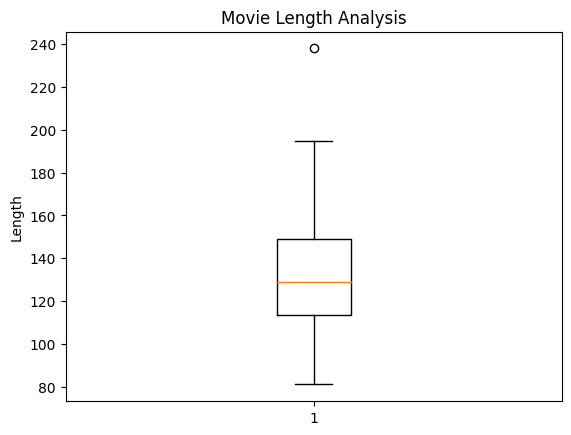

In [15]:
plt.boxplot(movies_df['length'])
plt.ylabel('Length')
plt.title('Movie Length Analysis')
plt.show()

### Top-Rated Movies:

<class 'pandas.core.frame.DataFrame'>


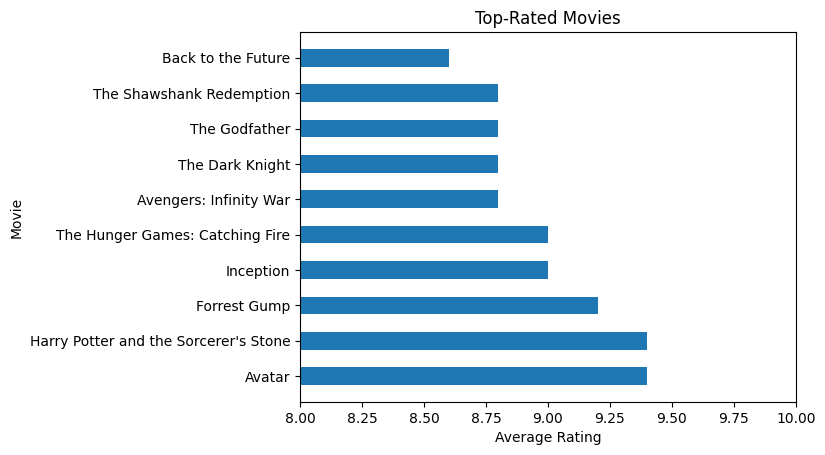

In [16]:
print(type(ratings_df))
top_rated_movies = ratings_df.groupby('movie_name')['rating'].mean().nlargest(10)
plt.barh(top_rated_movies.index, top_rated_movies , height = 0.5)
plt.xlabel('Average Rating')
plt.ylabel('Movie')
plt.title('Top-Rated Movies')
plt.xlim(8, 10) 
plt.show()

### User Ratings by Age Group:

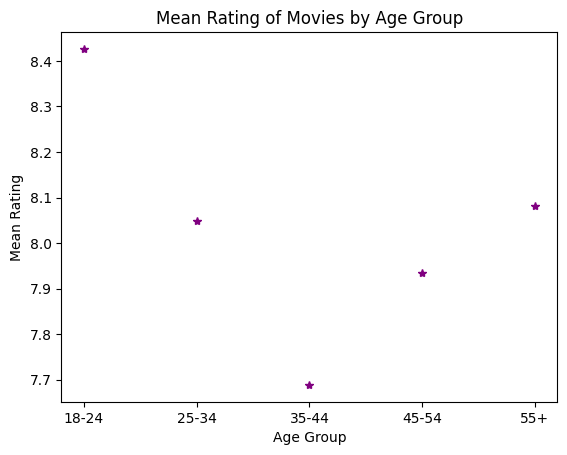

In [17]:
# Calculate the mean rating for each age group
mean_ratings = ratings_df.groupby('age_group')['rating'].mean()

plt.plot(mean_ratings.index, mean_ratings , '*' , color ='purple')

plt.xlabel('Age Group')
plt.ylabel('Mean Rating')
plt.title('Mean Rating of Movies by Age Group')

plt.show()

### Movie Ratings Distribution:

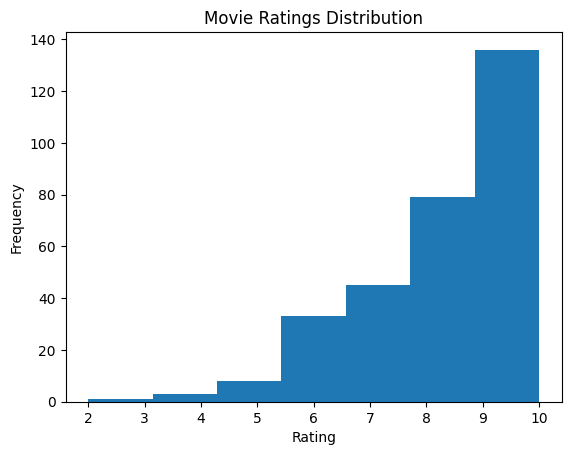

In [18]:
plt.hist(ratings_df['rating'], bins=7)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Movie Ratings Distribution')
plt.show()